
Cleaned Temperature Data:
   Latitude  Longitude  AverageTemperatureFahr  \
5    -36.17     175.03                 51.9062   
6    -36.17     175.03                 52.3886   
7    -36.17     175.03                 52.8530   
8    -36.17     175.03                 52.5776   
9    -36.17     175.03                 54.8726   

   AverageTemperatureUncertaintyFahr  Temp Cluster  
5                            36.9572             2  
6                            34.5488             2  
7                            33.5498             2  
8                            33.6380             2  
9                            33.9836             2  

Cleaned Pollution Data:
   AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0         51             1               36              0               51   
1         41             1                5              1               41   
2         66             1               39              2               66   
3         34 

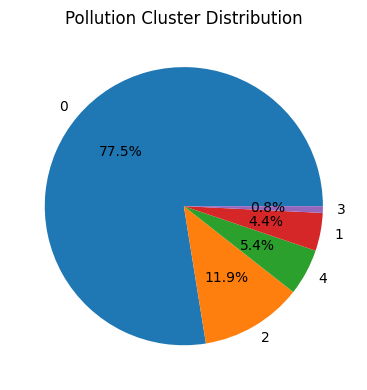

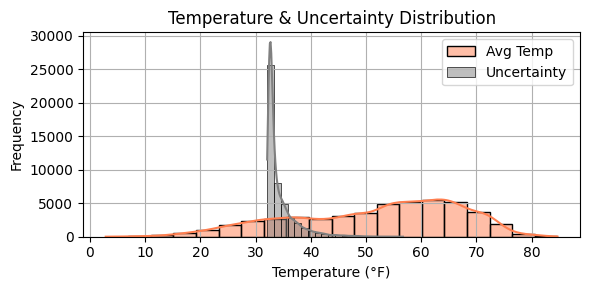

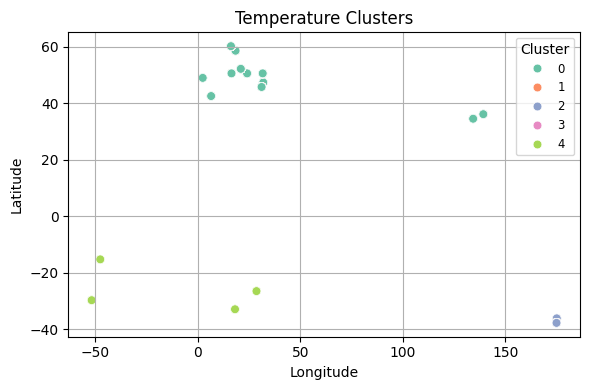

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def convert_coord(coord):
    if isinstance(coord, str):
        coord = coord.strip()
        if coord[-1] in ['S', 'W']:
            return -float(coord[:-1])
        elif coord[-1] in ['N', 'E']:
            return float(coord[:-1])
    return float(coord)

temp_df = pd.read_csv('/content/temperature.csv')
poll_df = pd.read_csv('/content/global air pollution dataset.csv')

temp_df['Latitude'] = temp_df['Latitude'].apply(convert_coord)
temp_df['Longitude'] = temp_df['Longitude'].apply(convert_coord)

temp_df = temp_df.dropna(subset=['AverageTemperatureFahr', 'AverageTemperatureUncertaintyFahr', 'Latitude', 'Longitude'])
poll_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
poll_df = poll_df.dropna(subset=poll_columns)


temp_features = temp_df[['Latitude', 'Longitude', 'AverageTemperatureFahr', 'AverageTemperatureUncertaintyFahr']]
temp_scaled = StandardScaler().fit_transform(temp_features)
temp_kmeans = KMeans(n_clusters=5, random_state=42)
temp_df['Temp Cluster'] = temp_kmeans.fit_predict(temp_scaled)

poll_scaled = StandardScaler().fit_transform(poll_df[poll_columns])
poll_kmeans = KMeans(n_clusters=5, random_state=42)
poll_df['Pollution Cluster'] = poll_kmeans.fit_predict(poll_scaled)

print("\nCleaned Temperature Data:")
print(temp_df[['Latitude', 'Longitude', 'AverageTemperatureFahr', 'AverageTemperatureUncertaintyFahr', 'Temp Cluster']].head())

print("\nCleaned Pollution Data:")
print(poll_df[poll_columns + ['Pollution Cluster']].head())

print("\nTemperature Cluster Counts:")
print(temp_df['Temp Cluster'].value_counts())

print("\nPollution Cluster Counts:")
print(poll_df['Pollution Cluster'].value_counts())

plt.figure(figsize=(4, 4))
poll_df['Pollution Cluster'].value_counts().plot.pie(autopct='%1.1f%%', title='Pollution Cluster Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(temp_df['AverageTemperatureFahr'], bins=20, kde=True, color='coral', label='Avg Temp')
sns.histplot(temp_df['AverageTemperatureUncertaintyFahr'], bins=20, kde=True, color='gray', label='Uncertainty', alpha=0.5)
plt.title('Temperature & Uncertainty Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=temp_df, x='Longitude', y='Latitude', hue='Temp Cluster', palette='Set2', s=40)
plt.title('Temperature Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', loc='best', fontsize='small')
plt.tight_layout()
plt.grid(True)
plt.show()
